# Linear Regression Playground (FILLED IN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# Utility: mean squared error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

## Loading training set

In [2]:
# Data domain
x_min, x_max = 0.0, 10.0

train_data = np.load("train_data.npz")
test_data = np.load("test_data.npz")

x_train = train_data["X"][:, 0]
y_train = train_data["y"]

x_test = test_data["X"][:, 0]
y_test = test_data["y"]

# Problem sizes
n_train = x_train.shape[0]
n_test = x_test.shape[0]

# Quick glance
print("Number of training samples =", n_train)
print("Number of test samples = ", n_test)

Number of training samples = 10
Number of test samples =  10


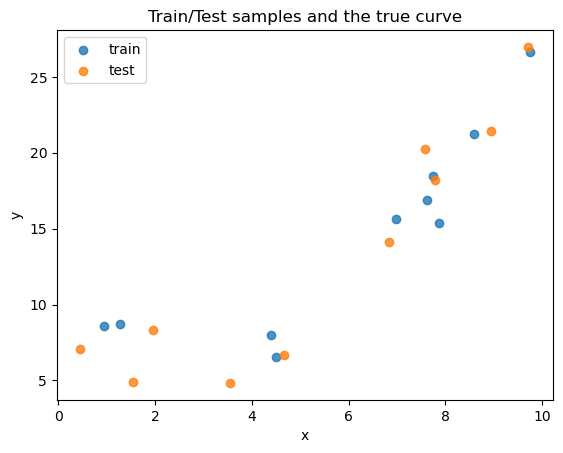

In [3]:
# Plot train & test data
xs = np.linspace(x_min, x_max, 400)
plt.figure()
plt.scatter(x_train, y_train, label="train", alpha=0.8)
plt.scatter(x_test,  y_test,  label="test",  alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Train/Test samples and the true curve")
plt.legend()
plt.show()

## 2) Constant Model

First we suppose we're trying to learn a constant fit as $f^{(0)}_b(x) = b$, to do so we consider the loss
$L(b) = \frac{1}{n}\sum_{i=1}^n (y_i - b)^2$.

*Question:* what value of $b$ minimises the loss? 

*Question:* observe the training loss $L$, is it indeed convex? is the test loss necessarily convex? 

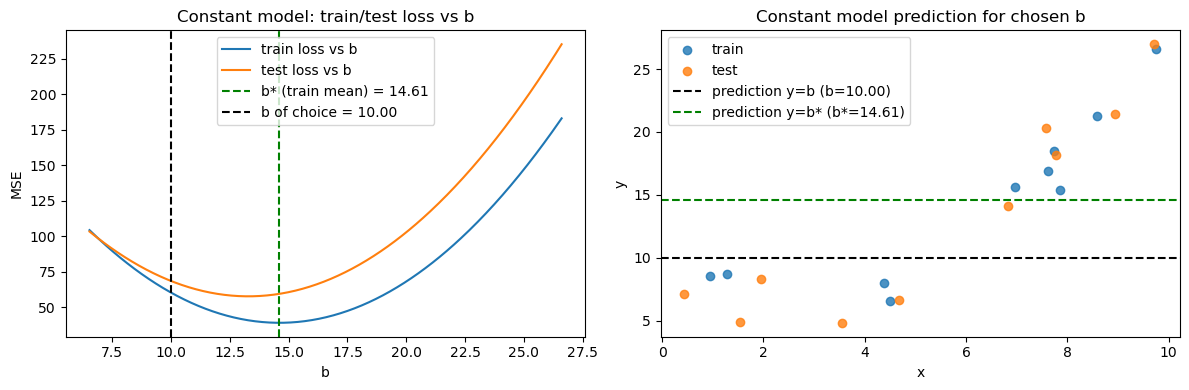

Train MSE (constant): 38.95
Test  MSE (constant): 59.34


In [4]:
# Grid of b values to visualize train MSE
b_grid = np.linspace(np.min(y_train), np.max(y_train), 400)

train_mse_grid = [mse(y_train, np.full_like(y_train, b)) for b in b_grid]
test_mse_grid = [mse(y_test, np.full_like(y_test, b)) for b in b_grid]

# Best constant by train mean of y
b_star_train = np.mean(y_train)

b_choice = 10            # <- change this to any b you want

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Left: MSE curves vs b ---
ax1.plot(b_grid, train_mse_grid, label="train loss vs b")
ax1.plot(b_grid, test_mse_grid,  label="test loss vs b")
ax1.axvline(b_star_train, linestyle="--",
            label=f"b* (train mean) = {b_star_train:.2f}", color = 'g')
ax1.axvline(b_choice, linestyle="--",
            label=f"b of choice = {b_choice:.2f}", color = 'k')
ax1.set_xlabel("b")
ax1.set_ylabel("MSE")
ax1.set_title("Constant model: train/test loss vs b")
ax1.legend()

# --- Right: prediction function y = b_choice ---
xs = np.linspace(x_min, x_max, 400)
ax2.scatter(x_train, y_train, label="train", alpha=0.8)
ax2.scatter(x_test,  y_test,  label="test",  alpha=0.8)
ax2.axhline(b_choice, linestyle="--", label=f"prediction y=b (b={b_choice:.2f})", color = 'k')
ax2.axhline(b_star_train, linestyle="--", label=f"prediction y=b* (b*={b_star_train:.2f})", color = 'g')

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Constant model prediction for chosen b")
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Train MSE (constant): {mse(y_train, np.full_like(y_train, b_star_train)):.2f}")
print(f"Test  MSE (constant): {mse(y_test,  np.full_like(y_test, b_star_train)):.2f}")

*Question:* what if we considered the training loss $\frac{1}{n}\sum_{i=1}^n |y_i - b|$? what would be the value of $b$ which minimises the loss?

## 3) Linear Model : Level Lines of the Loss

Now we consider a "more complex" model $f^{(1)}_{a, b}(x)=ax+b$.

We consider the **training loss** $L(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - (a x_i + b))^2$. 

*Question:* Recall how $L$ can be re-written as $L(w) = \frac{1}{n}\sum_{i=1}^n (y_i - \langle w, \phi_1(x) \rangle)^2$. I.e $w = ??$, $\phi_1(x) = ??$

*Question:* Can we reach zero-training loss? 

### Naive approach: grid search

*Question:* In the left plot below, what do the lines correspond to?

*Question:* play around with various values of $a$ and $b$, and understand the difference between the loss function plot (left) and the prediction function plot (right)

*Question:* In the code below, play around with the number of points in the grid.

Best values for a and b after the grid search = 1.88, 3.43


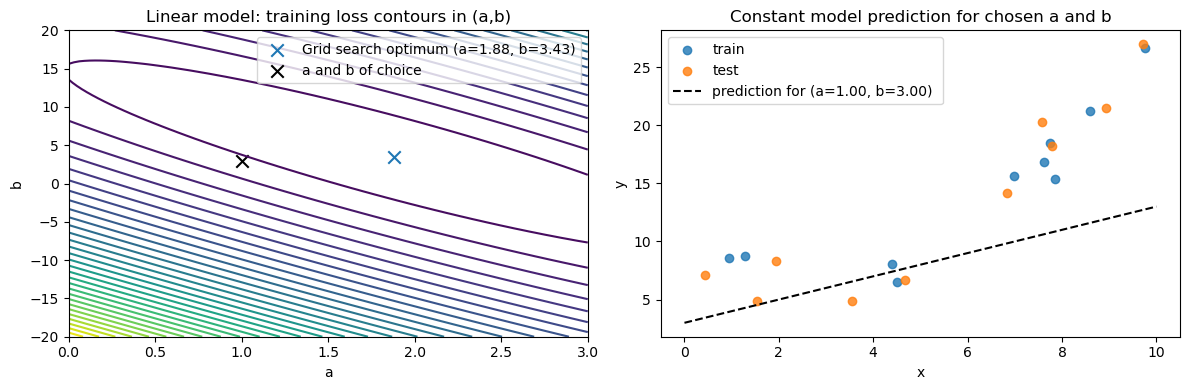

In [5]:
# Define loss grid
a_vals = np.linspace(0, 3.0, 100)  # <--- you can play with the number of points in the grid, observe how it affects the recovered solution
b_vals = np.linspace(-20.0, 20.0, 100)     # <--- you can play with the number of points in the grid
A, B = np.meshgrid(a_vals, b_vals, indexing='ij')  # (len(a), len(b))

# Compute L(a,b) grid
L = np.zeros((len(a_vals), len(b_vals)))
for i, a in enumerate(a_vals):
    for j, b in enumerate(b_vals):
        y_pred = a*x_train + b
        L[i, j] = mse(y_train, y_pred)

# get the "best" value a_star, b_star
ia, ib = np.unravel_index(np.argmin(L), L.shape)
a_best_grid = a_vals[ia]
b_best_grid = b_vals[ib]
print("Best values for a and b after the grid search = {:.2f}, {:.2f}".format(a_best_grid, b_best_grid))


#------- choose values of a and b ----
a_choice, b_choice = 1, 3
# a_choice, b_choice = a_best_grid, b_best_grid
        
# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Left: MSE curves ---
ax1.contour(A, B, L, levels=30)
ax1.scatter([a_best_grid], [b_best_grid], marker="x", s=80, label=f"Grid search optimum (a={a_best_grid:.2f}, b={b_best_grid:.2f})")
ax1.scatter([a_choice], [b_choice], marker="x", s=80, color = 'k', label="a and b of choice")
ax1.set_xlabel("a")
ax1.set_ylabel("b")
ax1.set_title("Linear model: training loss contours in (a,b)")
ax1.legend()

# --- Right: prediction function ---
xs = np.linspace(x_min, x_max, 400)
ax2.scatter(x_train, y_train, label="train", alpha=0.8)
ax2.scatter(x_test,  y_test,  label="test",  alpha=0.8)
ax2.plot(xs, a_choice * xs + b_choice, linestyle="--", label=f"prediction for (a={a_choice:.2f}, b={b_choice:.2f}) ", color = 'k')

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Constant model prediction for chosen a and b")
ax2.legend()

plt.tight_layout()
plt.show()

*Question:* What's the complexity of this grid search in terms of $n$, $d$ and the size of the grid?

*Question:* how is convexity observed in the above contour line plot?

*Question:* Where can the loss curve from the constant model be seen in the left plot above? Can you re-find the previous $b^\star = 14.61$ value? 

## Brute force: closed form solution

*Question:* Write down the feature matrix and recall the formula which gives the optimal solution? What does $d$ correspond here to? Is it the dimension of the input datapoints?

In [6]:
# Build design matrix
Phi2_train = np.column_stack([np.ones(n_train), x_train]) # n x d=2 matrix
Phi2_test = np.column_stack([np.ones(n_test), x_test])    # n x d=2 matrix

# Closed-form LS 
XtX = Phi2_train.T @ Phi2_train
Xty = Phi2_train.T @ y_train
w_star = np.linalg.inv(XtX) @ Xty    # <- explicit inverse
b_star, a_star = w_star               # w = [b, a]

# w_star = , *_ = np.linalg.lstsq(Phi1_train, y_train, rcond=None)  <-- here numpy uses smarter ways of solving the problem

best_train_d2 = mse(y_train, Phi2_train @ w_star)
best_test_d2 = mse(y_test,   Phi2_test  @ w_star)

print(f"Train MSE (linear): {best_train_d2:.2f}")
print(f"Test  MSE (linear): {best_test_d2:.2f}")

Train MSE (linear): 9.76
Test  MSE (linear): 11.14


*Question:* how do the train and test losses compare to the ones from the constant model? 

*Question:* can the test loss be lower than the train loss? 

*Question:* What's the complexity in terms of $n$ and $d$ of computing $w^\star$? 

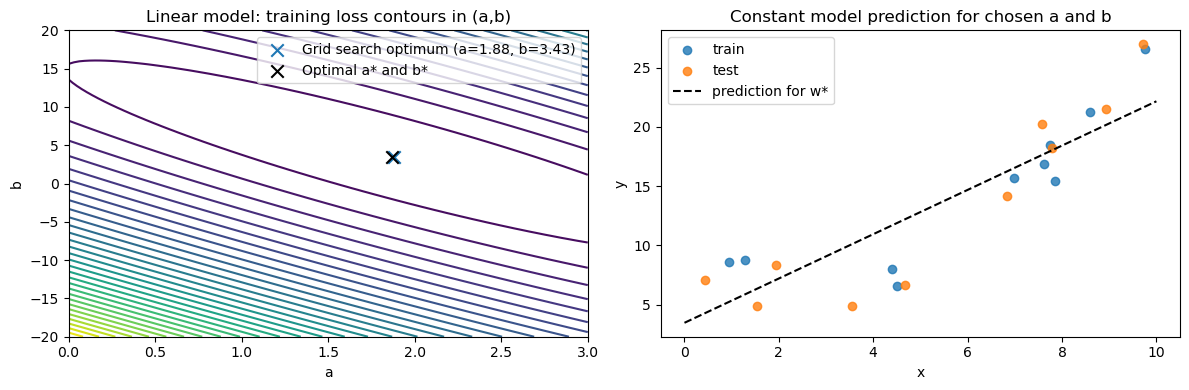

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Left: MSE curves ---
ax1.contour(A, B, L, levels=30)
ax1.scatter([a_best_grid], [b_best_grid], marker="x", s=80, label=f"Grid search optimum (a={a_best_grid:.2f}, b={b_best_grid:.2f})")
ax1.scatter([a_star], [b_star], marker="x", s=80, color = 'k', label="Optimal a* and b*")
ax1.set_xlabel("a")
ax1.set_ylabel("b")
ax1.set_title("Linear model: training loss contours in (a,b)")
ax1.legend()

# --- Right: prediction function ---
xs = np.linspace(x_min, x_max, 400)
ax2.scatter(x_train, y_train, label="train", alpha=0.8)
ax2.scatter(x_test,  y_test,  label="test",  alpha=0.8)
ax2.plot(xs, a_star * xs + b_star, linestyle="--", label=f"prediction for w*", color = 'k')

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Constant model prediction for chosen a and b")
ax2.legend()

plt.tight_layout()
plt.show()

*TODO:* plot the level lines of the test loss. Are they the same as those of the train loss?

## With gradient optimisation

*Question:* Write down the gradient of $L(w) = \frac{1}{n}\sum_{i=1}^n (y_i - \langle w, \phi_1(x) \rangle)^2$? 

In [8]:
def gd_least_squares(X, y, X_test, y_test, steps=200, lr=1e-2, w0=None):
    n, d = X.shape
    w = np.zeros(d) if w0 is None else w0.copy()
    losses, test_losses = [], []
    ws = [w.copy()]
    for t in range(steps):
        grad = (2.0/n) * (X.T @ (X @ w - y))  
        w -= lr * grad
        losses.append(mse(y, X @ w))
        test_losses.append(mse(y_test, X_test @ w))
        ws.append(w.copy())
    return np.array(ws), np.array(losses), np.array(test_losses)

def sgd_least_squares(X, y, X_test, y_test, steps=1000, lr=1e-2, w0=None):
    n, d = X.shape
    w = np.zeros(d) if w0 is None else w0.copy()
    losses, test_losses, ws = [], [], [w.copy()]
    for k in range(steps):
        ik = np.random.randint(n)                # chose a data point
        xik = X[ik]                           # shape (d,)
        yik = y[ik]
        grad = 2.0 * xik * (xik @ w - yik)     # QUESTION: Why is there a 2 here??
        w -= lr * grad
        losses.append(mse(y, X @ w))        # full-train loss for tracking
        test_losses.append(mse(y_test, X_test @ w))
        ws.append(w.copy())
    return np.array(ws), np.array(losses), np.array(test_losses)

*Question:* can the training loss augment along the optimisation path for gradient descent? and what about for stochastic gradient descent?

*Question:* are all the SGD runs the same?

*Question:* can constant stepsize SGD converge in this setting? What assumption is necessary over the training dataset in order to hope for constant stepsize SGD to converge?

*Question:* play around with the stepsizes and number iterations below.

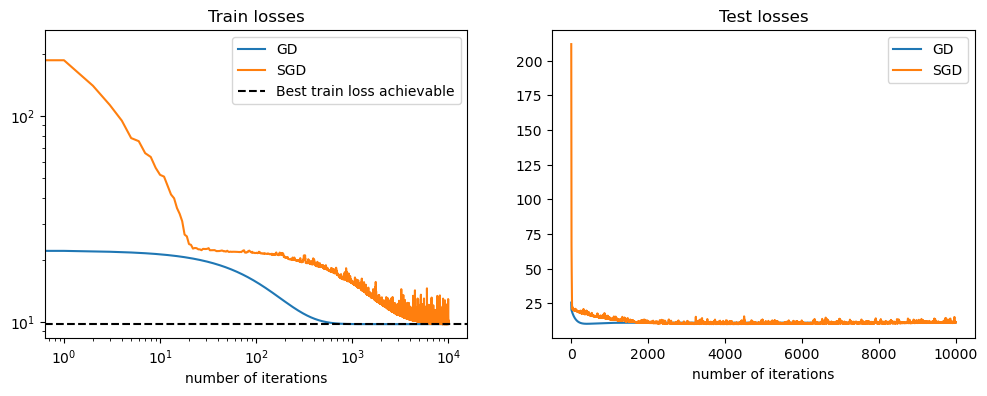

In [9]:
# ---- Run GD & SGD on the linear model (d=2) ----
steps_gd = 10000
steps_sgd = 10000
lr_gd = 1e-2
lr_sgd = 1 * 1e-3

w0 = np.array([-5.0, 0.5])  # you can pick anything here
ws_gd, losses_gd, test_losses_gd = gd_least_squares(Phi2_train, y_train, Phi2_test, y_test, steps=steps_gd, lr=lr_gd, w0 = w0)
ws_sgd, losses_sgd, test_losses_sgd = sgd_least_squares(Phi2_train, y_train, Phi2_test, y_test, steps=steps_sgd, lr=lr_sgd, w0 = w0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.loglog(losses_gd, label = 'GD')
ax1.loglog(losses_sgd, label = 'SGD')
ax1.axhline(best_train_d2, color = 'k', label = 'Best train loss achievable', linestyle = '--')
ax1.set_xlabel('number of iterations')
ax1.set_title('Train losses')
ax1.legend()

ax2.plot(test_losses_gd, label = 'GD')
ax2.plot(test_losses_sgd, label = 'SGD')
ax2.set_xlabel('number of iterations')
ax2.set_title('Test losses')
ax2.legend()
plt.show()

In [10]:
# Helpers to get the current (a,b) from trajectories
def get_ab(ws, k):
    b_k, a_k = ws[k, 0], ws[k, 1]  # w = [b, a]
    return a_k, b_k

# Plot function controlled by widgets
def show_iter(k=0, method='GD'):
    ws = ws_gd if method == 'GD' else ws_sgd
    a_k, b_k = get_ab(ws, k)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # --- Left: contours + trajectory up to k ---
    C = ax1.contour(A, B, L, levels=30)
    # ax1.clabel(C, inline=True, fontsize=8)

    traj = ws[:k+1]
    ax1.scatter(traj[:, 1], traj[:, 0], linewidth=1.5, label=f"{method} trajectory (0→{k})")
    ax1.scatter([a_k], [b_k], s=60, label=f"{method} @ k={k}")
    ax1.scatter([a_star], [b_star], marker="*", s=120, label="Closed-form LS")

    ax1.set_xlabel("a"); ax1.set_ylabel("b")
    ax1.set_title("Training loss contours with iterate")
    ax1.set_aspect("equal")
    ax1.set_ylim([-6, -3])
    ax1.legend(loc="best")

    # --- Right: prediction at iteration k ---
    xs = np.linspace(x_min, x_max, 400)
    ax2.scatter(x_train, y_train, label="train", alpha=0.7)
    ax2.scatter(x_test,  y_test,  label="test",  alpha=0.7)
    ax2.plot(xs, a_k*xs + b_k, linewidth=2.0, label=f"{method} k={k}")
    ax2.plot(xs, a_star*xs + b_star, linewidth=2.0, label="Closed-form LS")

    ax2.set_xlabel("x"); ax2.set_ylabel("y")
    ax2.set_title("Prediction function at iteration k")
    ax2.legend()

    plt.tight_layout()
    plt.show()

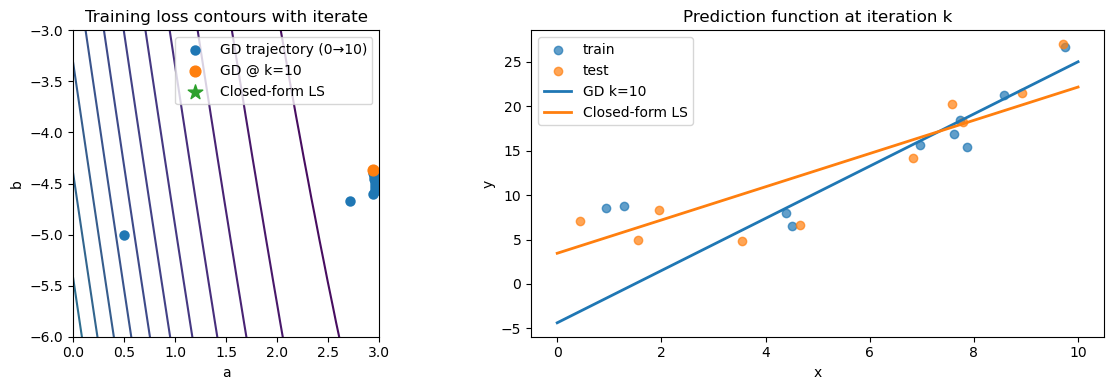

In [11]:
show_iter(k=10, method='GD')

*Question:* wait but how come the trajectory is not orthogonal to the level lines as you mentionned??!

## 4) Going further with polynomial expansions

Now we consider a "more complex" model $f^{(d)}_w(x)=w_0 + w_1 x + \cdots + w_{d} x^{d}$. 

We consider the **training loss** $L(w) = \frac{1}{n}\sum_{i=1}^n (y_i - f^{(d)}_w(x_i))^2$. 

*Question:* Recall how $L$ can be re-written as $L(w) = \frac{1}{n}\sum_{i=1}^n (y_i - \langle w, \phi_1(x_i) \rangle)^2$. I.e $w = ??$, $\phi_d(x_i) = ??$

*Question:* what is $d$ here? in which space does $w$ live in?

*Question:* Can we reach zero-training loss? If so, for which values of $d$? 

In [12]:
def make_vandermonde(x, d):
    # Columns: x^0, x^1, ..., x^{d-1}
    powers = [np.ones_like(x)]
    for k in range(1, d+1):
        powers.append(powers[-1] * x)
    return np.column_stack(powers)

def fit_pinv(X, y):
    # think of np.linalg.pinv(X)  as computing X.T (X X.T)^{-1} or (X.T X)^{-1} X.T depending on d < n or not 
    return np.linalg.pinv(X) @ y

*Question:* What do we expect the train loss to do as $d$ augments? and the test loss?

In [13]:
# Degrees to evaluate/plot
degrees_to_evaluate = list(range(0, 15))  # d = 0..14

train_mse_by_d = []
test_mse_by_d = []

fitted_by_d = {}

for d in degrees_to_evaluate:
    Xd_train = make_vandermonde(x_train, d)
    Xd_test  = make_vandermonde(x_test,  d)
    w = fit_pinv(Xd_train, y_train)
    fitted_by_d[d] = w
    train_mse_by_d.append(mse(y_train, Xd_train @ w))
    test_mse_by_d.append(mse(y_test,  Xd_test  @ w))

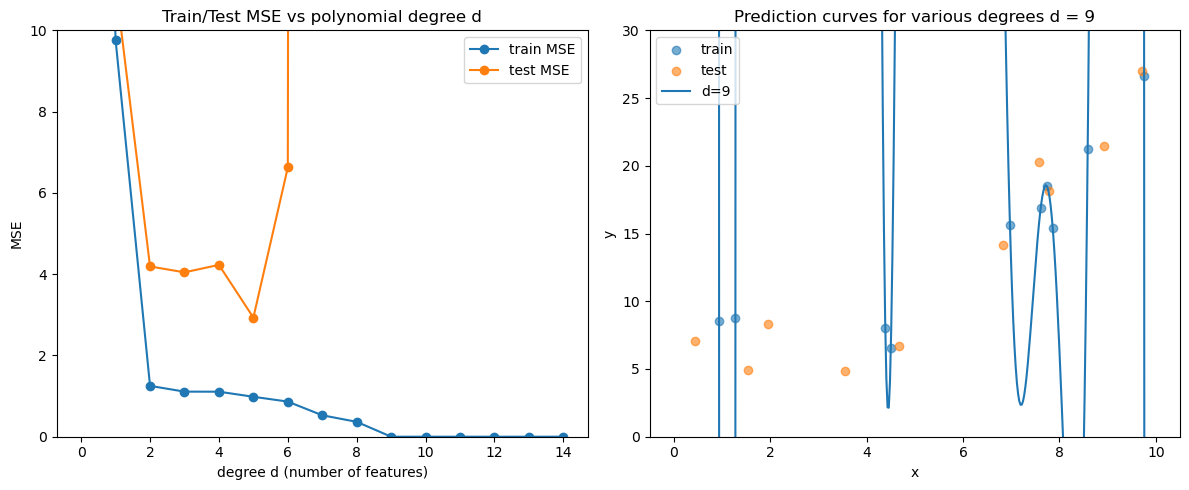

In [26]:
# Plot train/test MSE vs d
ds = np.array(degrees_to_evaluate)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Left plot: Train/Test MSE ---
axes[0].plot(ds, train_mse_by_d, marker="o", label="train MSE")
axes[0].plot(ds, test_mse_by_d,  marker="o", label="test MSE")
axes[0].set_xlabel("degree d (number of features)")
axes[0].set_ylabel("MSE")
axes[0].set_title("Train/Test MSE vs polynomial degree d")
axes[0].set_ylim([0, 10])
axes[0].legend()

# --- Right plot: Prediction functions ---
d = 9   # <-- play with the value of d here

xs_dense = np.linspace(x_min, x_max, 400)
axes[1].scatter(x_train, y_train, label="train", alpha=0.6)
axes[1].scatter(x_test,  y_test,  label="test",  alpha=0.6)

Xd_dense = make_vandermonde(xs_dense, d)
w = fitted_by_d.get(d)
y_pred_dense = Xd_dense @ w
axes[1].plot(xs_dense, y_pred_dense, label=f"d={d}")
axes[1].set_ylim(0, 30)
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_title("Prediction curves for various degrees d = {}".format(d))
axes[1].legend()

plt.tight_layout()
plt.show()

*Question:* what value of polynomial expansion degree whould one pick according to the above plots?

*Question:* comment the train and test loss curves

*Question:* how it the fact that $L(w^\star) = 0$ represented in the above right plot?

## Using regularisation

To avoid the catastrophic overfitting observed above, we can use $\ell_2$ regularisation (called weight decay in deep learning), this corresponds to minimising the regularised loss $L_\lambda(w) = L(w) + \lambda \Vert w \Vert^2 = \frac{1}{n}\sum_{i=1}^n (y_i - f^{(d)}_w(x_i))^2 +  \lambda \Vert w \Vert^2$. We can then denote $w^\star_\lambda = \arg \min L_\lambda$.

*Question:* for $\lambda \geq 0$, is $L_\lambda$ a convex function? 

*Question:* should we compute the test loss using the reguralisation term too, or without? 

*Question:* for $\lambda > 0$, can we have $L(w^\star_\lambda) = 0$?

*Question:* what does $w^\star_\lambda$ converge to as $\lambda \to \infty$?

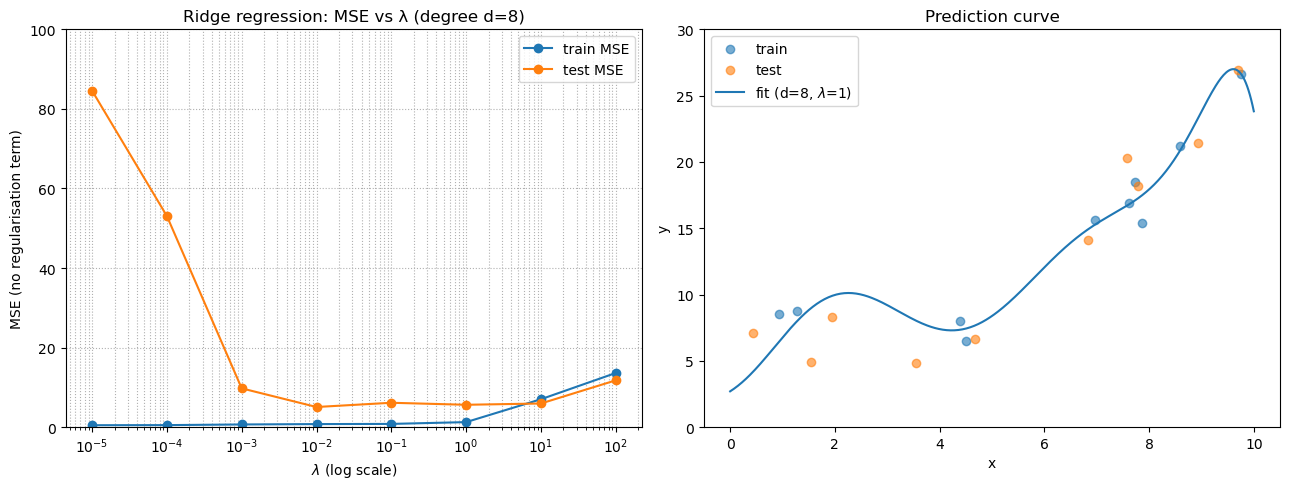

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def fit_ridge(X, y, lam):
    d = X.shape[1]
    A = X.T @ X
    reg = lam * np.eye(d)
    return np.linalg.solve(A + reg, X.T @ y)

# ---- Choose a polynomial degree to study vs λ ----
d = 8   # <-- change this to whatever degree you want

# ---- Build design matrices for that degree ----
Xd_train = make_vandermonde(x_train, d)
Xd_test  = make_vandermonde(x_test,  d)

# ---- λ values to sweep ----
lambdas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, int(1e2)])

train_mse_by_lambda = []
test_mse_by_lambda  = []
weights_by_lambda   = {}

for lam in lambdas:
    w = fit_ridge(Xd_train, y_train, lam=lam)
    weights_by_lambda[lam] = w
    # pure prediction errors (no reg term included)
    train_mse_by_lambda.append(mse(y_train, Xd_train @ w))
    test_mse_by_lambda.append(mse(y_test,  Xd_test  @ w))

# ---- Inspect a particular λ on a dense grid ----
lam_to_plot = 1 # <-- change if you want to visualise another λ

xs_dense = np.linspace(x_min, x_max, 400)
Xd_dense = make_vandermonde(xs_dense, d)
w_sel = weights_by_lambda[lam_to_plot]
y_pred_dense = Xd_dense @ w_sel

# ---- Plot both side by side ----
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Left plot: Train/Test MSE vs λ
axes[0].plot(lambdas, train_mse_by_lambda, marker="o", label="train MSE")
axes[0].plot(lambdas, test_mse_by_lambda,  marker="o", label="test MSE")
axes[0].set_xscale("log")
axes[0].set_xlabel(r"$\lambda$ (log scale)")
axes[0].set_ylabel("MSE (no regularisation term)")
axes[0].set_title(f"Ridge regression: MSE vs λ (degree d={d})")
axes[0].set_ylim([0, 100])
axes[0].legend()
axes[0].grid(True, which="both", ls=":")

# Right plot: Prediction curve for one λ
axes[1].scatter(x_train, y_train, alpha=0.6, label="train")
axes[1].scatter(x_test,  y_test,  alpha=0.6, label="test")
axes[1].plot(xs_dense, y_pred_dense,
             label=rf"fit (d={d}, $\lambda$={lam_to_plot})")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_title("Prediction curve")
axes[1].legend()
axes[1].set_ylim(0, 30)

plt.tight_layout()
plt.show()

## Playing with other expansions

In [16]:
def make_sinus(x, d):
    # Columns: x^0, x^1, ..., x^{d-1}
    frequencies = [np.ones_like(x)]
    for k in range(1, d+1):
        frequencies.append(np.sin(k * x))
        frequencies.append(np.cos(k * x))
    return np.column_stack(frequencies)

In [17]:
# Degrees to evaluate/plot
freqs = list(range(0, 10))  # d = 0..14

train_mse_by_freq = []
test_mse_by_freq = []

fitted_by_freq = {}

for freq in freqs:
    Xd_train = make_sinus(x_train, freq)
    Xd_test  = make_sinus(x_test,  freq)
    w = fit_pinv(Xd_train, y_train)
    fitted_by_freq[freq] = w
    train_mse_by_freq.append(mse(y_train, Xd_train @ w))
    test_mse_by_freq.append(mse(y_test,  Xd_test  @ w))

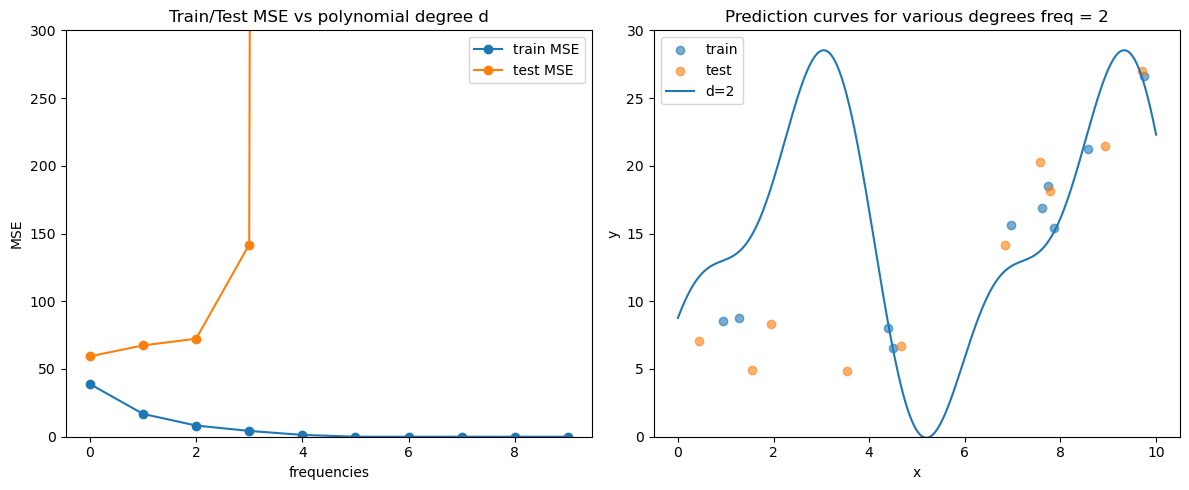

In [18]:
# Plot train/test MSE vs freq
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Left plot: Train/Test MSE ---
axes[0].plot(freqs, train_mse_by_freq, marker="o", label="train MSE")
axes[0].plot(freqs, test_mse_by_freq,  marker="o", label="test MSE")
axes[0].set_xlabel("frequencies")
axes[0].set_ylabel("MSE")
axes[0].set_title("Train/Test MSE vs polynomial degree d")
axes[0].set_ylim([0, 300])
axes[0].legend()

# --- Right plot: Prediction functions ---
freq = 2  # <-- play with the value of d here

xs_dense = np.linspace(x_min, x_max, 400)
axes[1].scatter(x_train, y_train, label="train", alpha=0.6)
axes[1].scatter(x_test,  y_test,  label="test",  alpha=0.6)

Xd_dense = make_sinus(xs_dense, freq)
w = fitted_by_freq.get(freq)
y_pred_dense = Xd_dense @ w
axes[1].plot(xs_dense, y_pred_dense, label=f"d={freq}")
axes[1].set_ylim(0, 30)
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_title("Prediction curves for various degrees freq = {}".format(freq))
axes[1].legend()

plt.tight_layout()
plt.show()

# You've reached the end, bravo!